Saving cleaned_student_data .csv to cleaned_student_data .csv
Explained variance ratio:
 [0.20711662 0.16938144 0.09756355 0.0760559  0.06984939]
Data after PCA:
         PC1       PC2       PC3       PC4       PC5
0 -0.762107  0.435759 -3.006387 -0.427474  0.759504
1  1.037689 -3.249164 -1.009484  0.674464  0.392536
2  2.867074 -2.052261 -0.290716 -0.549505 -0.495587
3 -2.720085 -0.482993  0.665663 -0.601958 -1.307673
4 -0.709031 -0.338206 -1.379485  0.144028 -1.079291


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

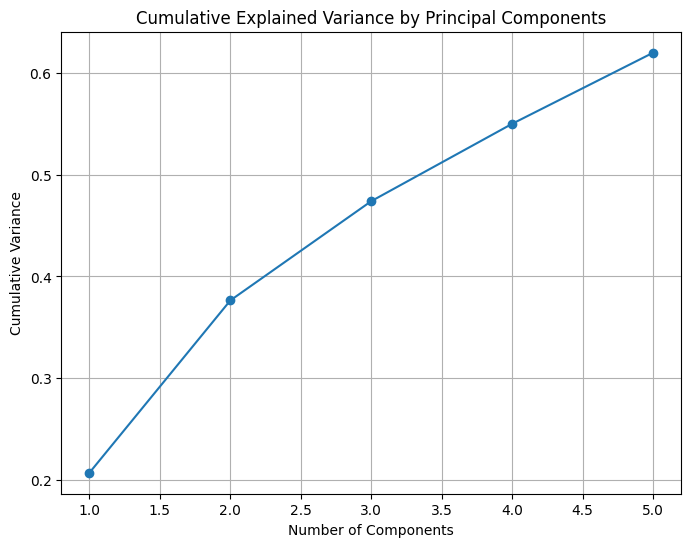

In [2]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('cleaned_student_data.csv')  # Use preprocessed data

# Dimensionality Reduction
# Justification: Reduces features to principal components to avoid overfitting and improve efficiency.
numerical_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'family_edu', 'total_alcohol']
X = df[numerical_cols].apply(pd.to_numeric, errors='coerce')

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

print("Explained variance ratio:\n", pca.explained_variance_ratio_)
print("Data after PCA:\n", pca_df.head())

# EDA Visualization: Scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.grid(True)
plt.savefig('pca_scree_plot.png')
from google.colab import files
files.download('pca_scree_plot.png')
plt.show()
